In [70]:
import numpy as np

In [71]:
alhpa = 3 
cooficients_lab:float = [0.0, -2.0, 1.0, 5.0, -2.0, 1.0]
a5, a4, a3, a2, a1, a0 = cooficients_lab
k = 3
expression = f"{a5}*(1+{alhpa})*x^5+{a4}*x^4+{a3}*x^3+{a2}*x^2+{a1}*x+{k*a0}"
simplified = "-2x^4 + 1x^3 + 5x^2 - 2x^1 + 3"
koef = [-2, 1,  5, -2, 3]

In [72]:

import math

def result_function(a, kof):
    result = 0
    for i in range(len(kof)):
        if i == len(kof) - 1:
            result += kof[i]
        else:
            result += kof[i] * math.pow(a, len(kof) - i - 1)
    return result

def derivative(kof):
    new_kof = [0] * (len(kof) - 1)
    for i in range(len(kof) - 1):
        new_kof[i] = kof[i] * (len(kof) - 1 - i)
    return new_kof

def method_bisection(kof, a, b):
    e = 0.000001
    x = 0
    n = 0
    
    while abs(b - a) > e:
        n += 1
        x = (a + b) / 2 # 
        if result_function(a, kof) * result_function(x, kof) < 0:
            b = x
        else:
            a = x
    
    print("Number of iteration:", n)
    return x

def method_chord(kof, a, b):
    e = 0.000001
    
    fkof = derivative(kof)
    skof = derivative(fkof)
    if result_function((a + b) / 2, fkof) * result_function((a + b) / 2, skof) > 0:
        x0 = b
        x1 = a
    else:
        x0 = a
        x1 = b
    
    current_x = 0
    prev_x = x1
    n = 0
    
    while True:
        n += 1
        current_x = prev_x - result_function(prev_x, kof) / (result_function(prev_x, kof) - result_function(x0, kof)) * (prev_x - x0)

        if abs(current_x - prev_x) < e:
            break
        
        prev_x = current_x
    
    print("Number of iteration:", n)
    return current_x

    
def method_newton(kof, a, b):

    e = 0.000001
    fkof = derivative(kof)
    skof = derivative(fkof)

    if result_function((a + b) / 2, fkof) * result_function((a + b) / 2, skof) > 0:
        prev_x = b
    else:
        prev_x = a
    
    current_x = 0
    n = 0
    
    while True:
        n += 1
        current_x = prev_x - result_function(prev_x, kof) / result_function(prev_x, fkof)

        if abs(current_x - prev_x) < e:
            break
        
        prev_x = current_x
    
    print("Number of iteration:", n)
    return current_x

alhpa = 3 
cooficients_lab:float = [0.0, -2.0, 1.0, 5.0, -2.0, 1.0]
a5, a4, a3, a2, a1, a0 = cooficients_lab
k = 3
expression = f"{a5}*(1+{alhpa})*x^5+{a4}*x^4+{a3}*x^3+{a2}*x^2+{a1}*x+{k*a0}"
simplified = "-2x^4 + 1x^3 + 5x^2 - 2x^1 + 3"
koef = [-2, 1,  5, -2, 3]

In [73]:

newton = method_newton(koef, -3, -1)
chord = method_chord(koef,  -2, -1)
bisection = method_bisection(koef, -3, -1)
print(f"""
Raw Expression: {expression}
Expression:     {simplified}
Newton:    {newton:2.7f} 
Chord:     {chord:2.7f}
Bisection: {bisection:2.7f}
""")

round(newton, 5) == round(chord, 5) == round(bisection, 5)

Number of iteration: 7
Number of iteration: 13
Number of iteration: 21

Raw Expression: 0.0*(1+3)*x^5+-2.0*x^4+1.0*x^3+5.0*x^2+-2.0*x+3.0
Expression:     -2x^4 + 1x^3 + 5x^2 - 2x^1 + 3
Newton:    -1.6726323 
Chord:     -1.6726318
Bisection: -1.6726332



True

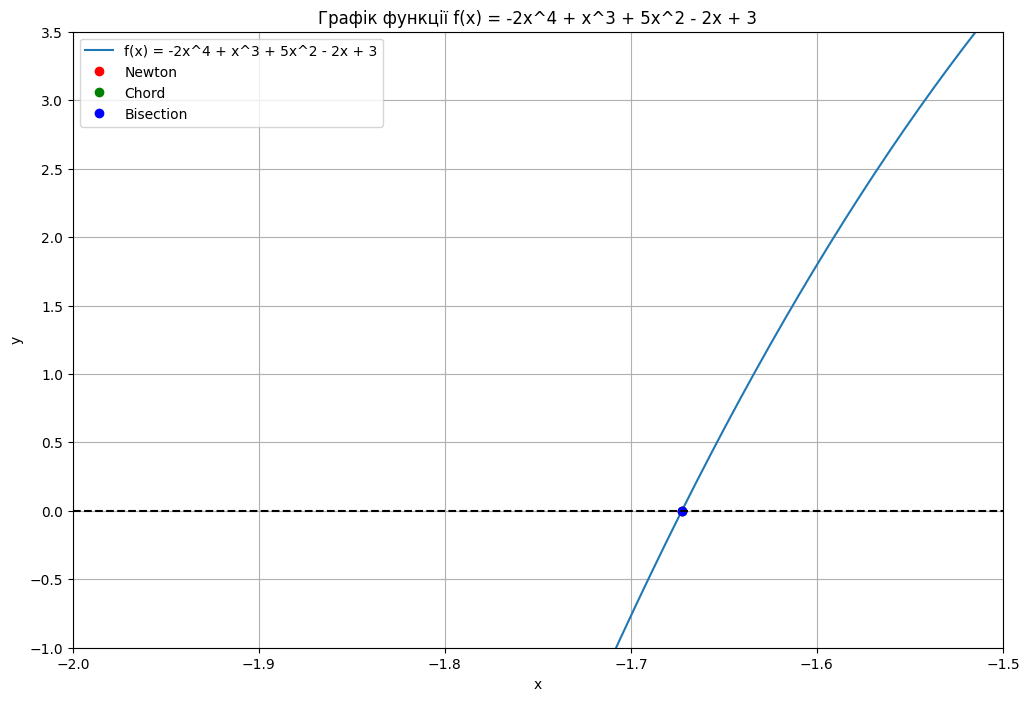

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -2*x**4 + x**3 + 5*x**2 - 2*x + 3

# Створення масиву x-значень з фокусом на область коренів
x = np.linspace(-2.5, -0.5, 1000)

# Обчислення відповідних y-значень
y = f(x)

# Створення графіку
plt.figure(figsize=(12, 8))
plt.plot(x, y, label='f(x) = -2x^4 + x^3 + 5x^2 - 2x + 3')


plt.plot(newton, f(newton), 'ro', label='Newton')
plt.plot(chord, f(chord), 'go', label='Chord')
plt.plot(bisection, f(bisection), 'bo', label='Bisection')

# Анотація точки (0, 3)
plt.annotate('(0, 0)', xy=(0, 0), xytext=(0, 0),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Налаштування графіку
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік функції f(x) = -2x^4 + x^3 + 5x^2 - 2x + 3')
plt.legend()
plt.grid(True)

plt.xlim(-2.0, -1.5)
plt.ylim(-1, 3.5)

plt.show()